In [2]:
import 数据处理 as dp
from 数据处理 import *

M:\work\project_program\bishe\pyproject\RL_pid_control_critic_actor\强化学习+Lstm\数据处理\数据处理.py:128: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_dataframe[column] = data[column]


In [3]:
file_paths = dp.get_csv (r"E:\file_comb\核二院\数据\wuhan\数据采集0421\SGTR")
file_paths

['E:\\file_comb\\核二院\\数据\\wuhan\\数据采集0421\\SGTR\\20220413_151912-SGTR0.5.csv',
 'E:\\file_comb\\核二院\\数据\\wuhan\\数据采集0421\\SGTR\\20220414_095706-SGTR0.6.csv',
 'E:\\file_comb\\核二院\\数据\\wuhan\\数据采集0421\\SGTR\\20220414_162807-SGTR0.7.csv',
 'E:\\file_comb\\核二院\\数据\\wuhan\\数据采集0421\\SGTR\\20220415_101156-SGTR0.65.csv',
 'E:\\file_comb\\核二院\\数据\\wuhan\\数据采集0421\\SGTR\\20220415_144441-SGTR0.4.csv',
 'E:\\file_comb\\核二院\\数据\\wuhan\\数据采集0421\\SGTR\\20220417_085212-SGTR0.9.csv',
 'E:\\file_comb\\核二院\\数据\\wuhan\\数据采集0421\\SGTR\\20220418_095843-SGTR0.95.csv',
 'E:\\file_comb\\核二院\\数据\\wuhan\\数据采集0421\\SGTR\\20220418_143227-SGTR0.8.csv']

In [4]:
pdframe = []
for path in file_paths:
	pdframe.append (get_single_table (path,file_paths))

In [5]:
pdframe[0]["3rcp028mt"]-pdframe[1]["3rcp028mt"]

0       0.000
1       0.020
2      -0.053
3      -0.081
4      -0.060
        ...  
4497      NaN
4498      NaN
4499      NaN
4500      NaN
4501      NaN
Name: 3rcp028mt, Length: 4502, dtype: float64

In [6]:
presurzer_data=[]
for i in range (len (pdframe)):
	presurzer_data.append(get_target_data (pdframe[i],sort=True))

In [7]:
presurzer_data[1]

,稳压器液位,稳压器压力,上冲流量,下泄流量,喷淋阀开度,上冲阀门开度,下泄阀门开度,电加热器数量
0,0.093956,15.3675,10.24580,13.58230,0.0,27.2927,34.2778,4
1,0.086554,15.3483,10.30040,13.57130,0.0,27.3025,34.2673,4
2,0.073698,15.3240,10.51400,13.55870,0.0,27.5560,34.2579,4
3,0.058662,15.3001,10.73720,13.55080,0.0,27.8693,34.2445,4
4,0.044220,15.2846,11.03460,13.54190,0.0,28.2580,34.2319,4
...,...,...,...,...,...,...,...,...
4012,2.881633,11.0048,6.00016,5.16547,15.0,12.3331,20.2718,6
4013,2.881633,11.0048,6.00016,5.16547,15.0,12.3331,20.2718,6
4014,2.881633,11.0048,6.00016,5.16547,15.0,12.3331,20.2718,6
4015,2.881633,11.0048,6.00016,5.16547,15.0,12.3331,20.2718,6


In [8]:
import sys

sys.path.append ("..")
from LSTM模型 import keras_model  # 导入



In [9]:
presurzer_data_concat = pd.concat (presurzer_data)

In [10]:
def cal_concat_mean_std (data_array: np.ndarray,train_size: float,val_size: float):
	num_time_steps = data_array.shape[0]
	num_train,num_val = (int (num_time_steps * train_size),int (num_time_steps * val_size),)
	# 计算标准化时启用
	train_array = data_array[:num_train]
	mean,std = train_array.mean (axis=0),train_array.std (axis=0)
	return mean,std
mean,std=cal_concat_mean_std(presurzer_data_concat,0.9,0.1)

In [11]:
print(mean,std)

稳压器液位     -2.503847
稳压器压力     11.337488
上冲流量       5.034266
下泄流量       1.163769
喷淋阀开度     14.824699
上冲阀门开度    87.936783
下泄阀门开度     3.114024
电加热器数量     3.770940
dtype: float64 稳压器液位      2.606036
稳压器压力      0.979141
上冲流量      10.699756
下泄流量       3.623029
喷淋阀开度     13.476293
上冲阀门开度    26.124241
下泄阀门开度     9.485861
电加热器数量     2.853365
dtype: float64


In [12]:
train_batch_dataset,val_batch_dataset,test_batch_dataset,train_datasets,train_label_sets,val_datasets,val_label_sets,test_datasets,test_label_sets,mean,std = keras_model.get_data (
	True,presurzer_data,4,mean,std,True)

In [13]:
train_datasets.shape

(27364, 10, 8)

In [16]:
type(train_datasets)

numpy.ndarray

In [18]:
model = keras_model.create_model (inputshape=(10,8),outputshape=4)
check_point_fill = 'best_model.hdf5'
check_point_callback = tf.keras.callbacks.ModelCheckpoint (filepath=check_point_fill,moniter='loss',save_best_only=True,
                                                           save_weights_only=False)
history = model.fit (train_batch_dataset,epochs=60,validation_data=val_batch_dataset,callbacks=[check_point_callback])

Epoch 1/60
214/214 [==============================] - 14s 21ms/step - loss: 0.4857 - val_loss: 1.0840
Epoch 2/60
214/214 [==============================] - 4s 17ms/step - loss: 0.1603 - val_loss: 0.7197
Epoch 3/60
214/214 [==============================] - 4s 19ms/step - loss: 0.0821 - val_loss: 0.5682
Epoch 4/60
214/214 [==============================] - 4s 19ms/step - loss: 0.0605 - val_loss: 0.4236
Epoch 5/60
214/214 [==============================] - 4s 19ms/step - loss: 0.0478 - val_loss: 0.2976
Epoch 6/60
214/214 [==============================] - 4s 17ms/step - loss: 0.0383 - val_loss: 0.2142
Epoch 7/60
214/214 [==============================] - 4s 18ms/step - loss: 0.0321 - val_loss: 0.1665
Epoch 8/60
214/214 [==============================] - 4s 17ms/step - loss: 0.0282 - val_loss: 0.1407
Epoch 9/60
214/214 [==============================] - 4s 17ms/step - loss: 0.0257 - val_loss: 0.1264
Epoch 10/60
214/214 [==============================] - 4s 17ms/step - loss: 0.0240 - val_l

In [16]:
def result (val_datasets,val_label_sets):
	model.load_weights ('best_model.hdf5')
	val_predict = model.predict (val_datasets,verbose=1)
	plt.rcParams['font.sans-serif'] = ['SimHei']  # 显⽰中文
	plt.rcParams['axes.unicode_minus'] = False  # 显⽰负号
	labels_str = presurzer_data[0].columns.tolist ()
	for i in range (4):
		plt.figure (figsize=(10,8))
		plt.plot (val_label_sets[:,i],label="RealValue")
		plt.plot (val_predict[:,i],'r--',label="PredictValue")
		plt.title (labels_str[i],fontsize=20)
		plt.legend (fontsize=15)
		#plt.savefig(f"D:\\file_comb\\研究生毕业论文\\中期检查\\ppt\\图片\\{labels_str[i]}.svg",dpi=300, bbox_inches='tight')
		plt.show ()
	# for i in range (4):
	# 	plt.figure (figsize=(10,8))
	# 	plt.plot (val_label_sets[:,i],label="RealValue")
	# 	#plt.plot (val_predict[:,i],'r--',label="PredictValue")
	# 	plt.title (labels_str[i],fontsize=20)
	# 	plt.legend (fontsize=15)
	# 	#plt.savefig(f"D:\\file_comb\\研究生毕业论文\\中期检查\\ppt\\图片\\{labels_str[i]}.svg",dpi=300, bbox_inches='tight')
	# 	plt.show ()


139/139 [==============================] - 1s 3ms/step


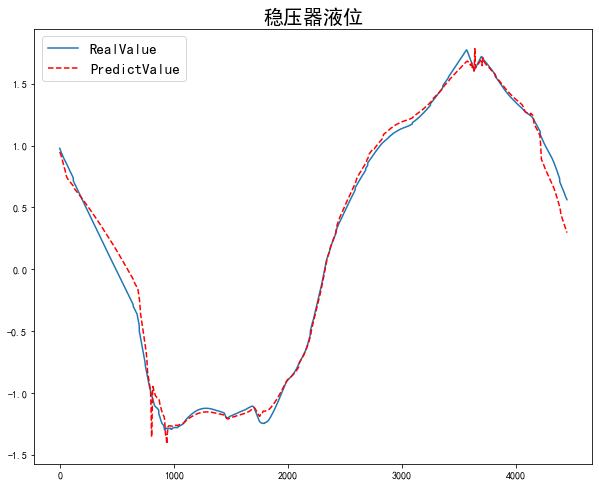

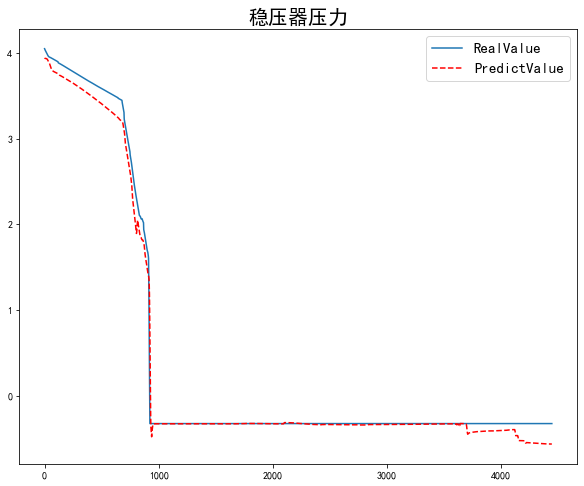

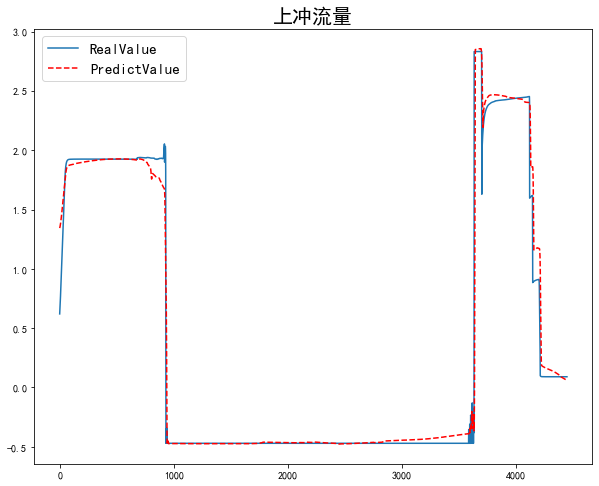

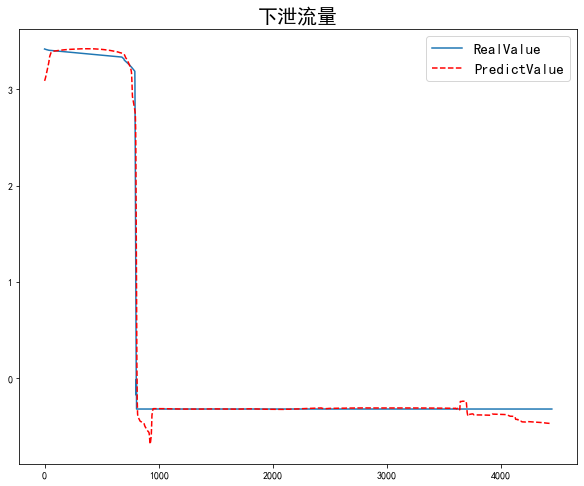

124/124 [==============================] - 0s 3ms/step


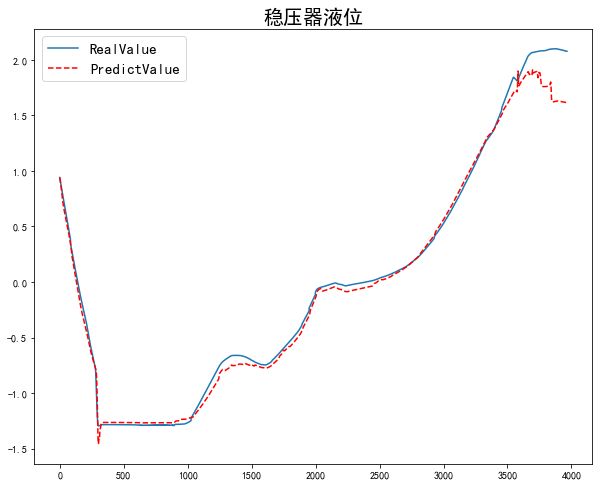

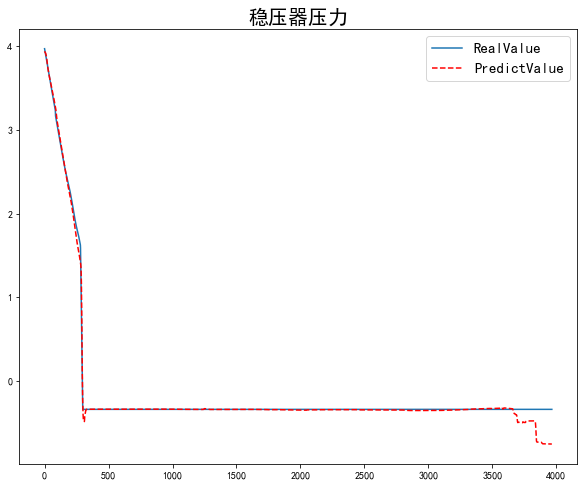

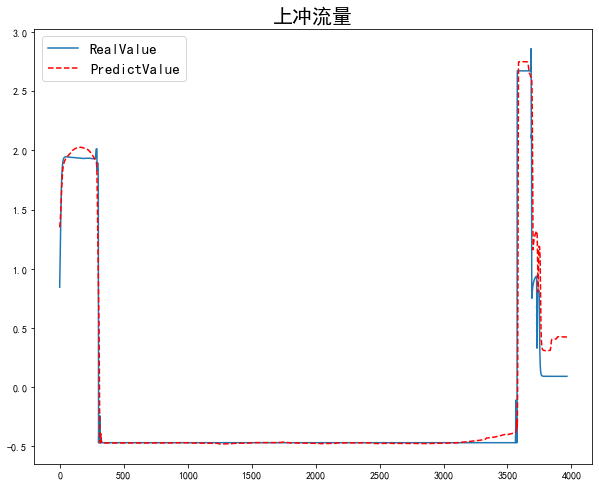

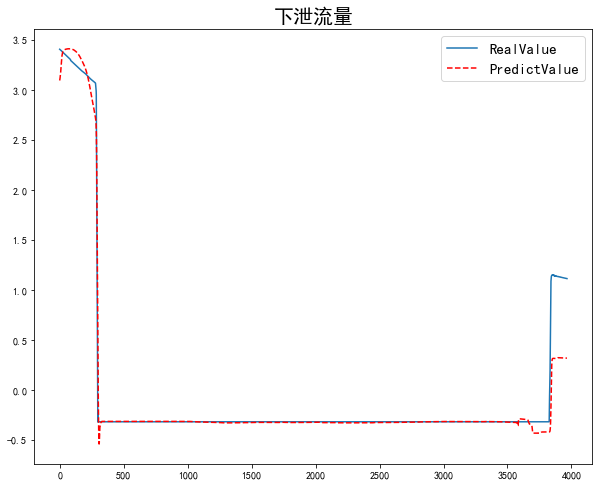

112/112 [==============================] - 0s 3ms/step


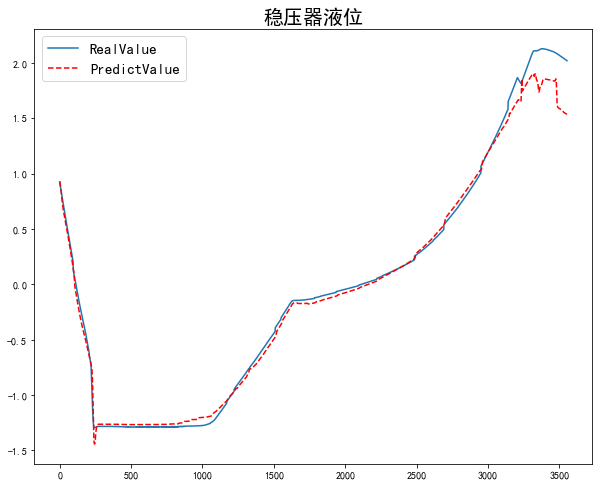

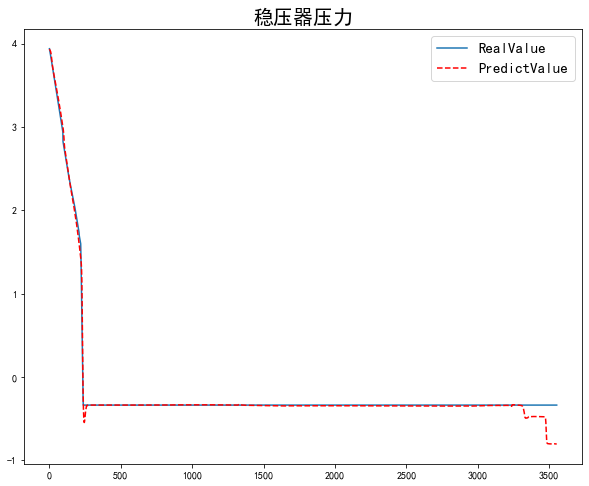

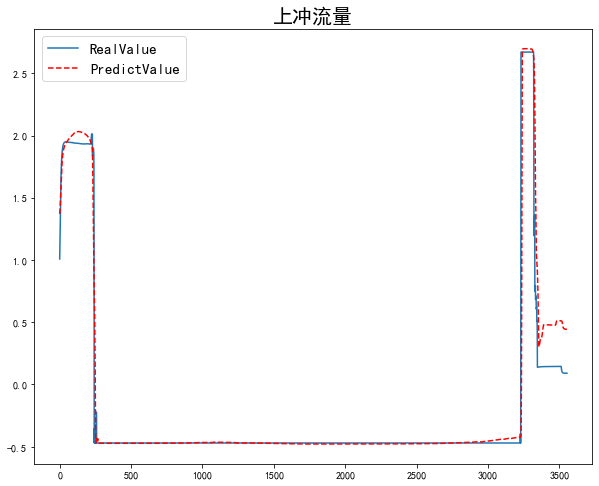

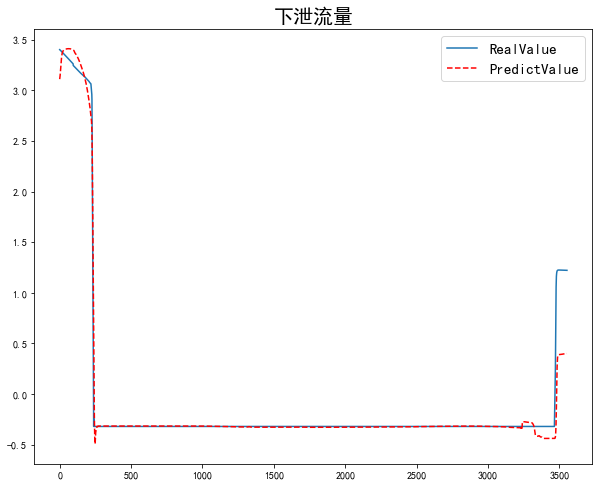

112/112 [==============================] - 0s 3ms/step


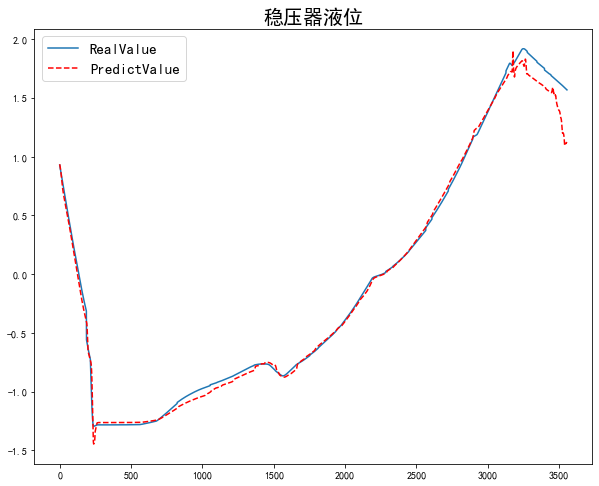

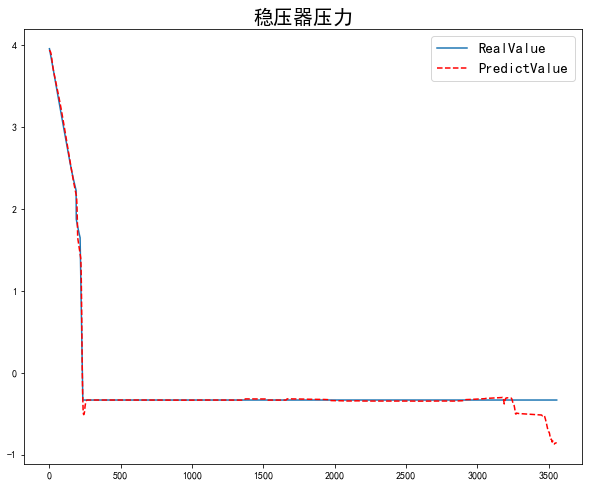

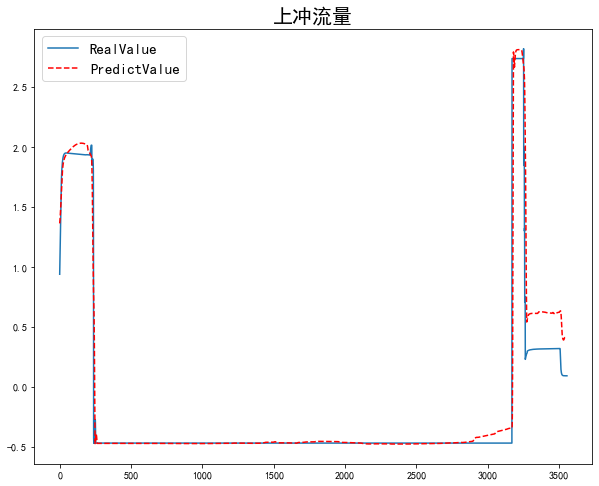

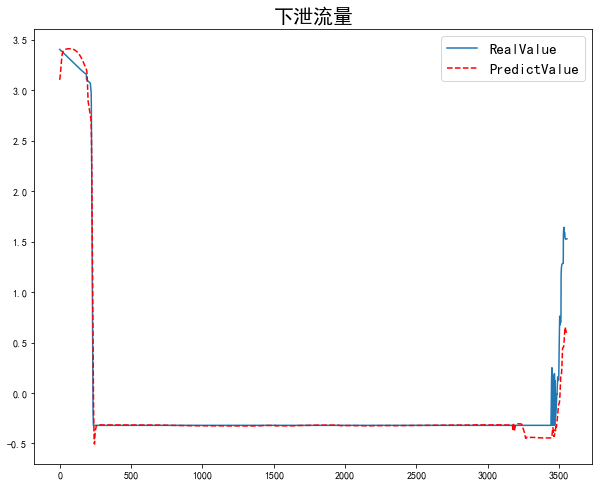

91/91 [==============================] - 0s 3ms/step


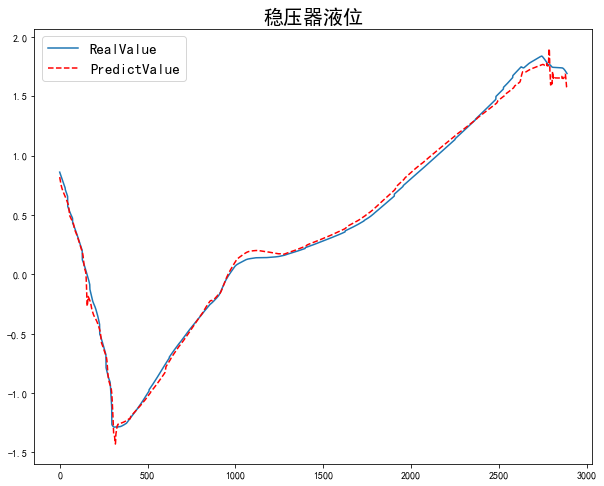

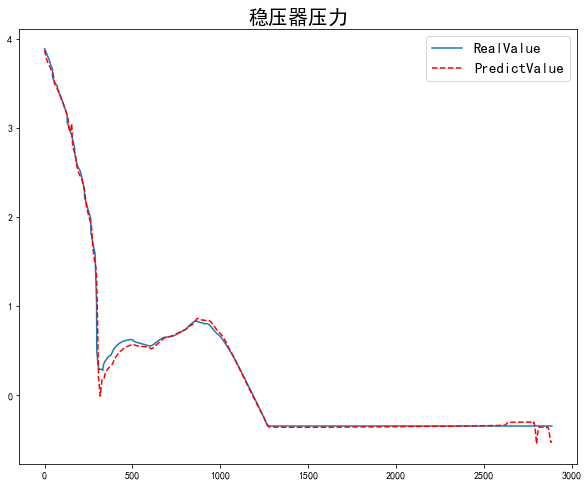

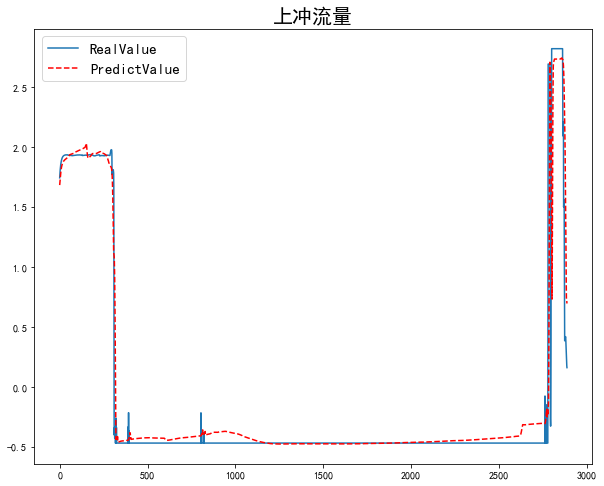

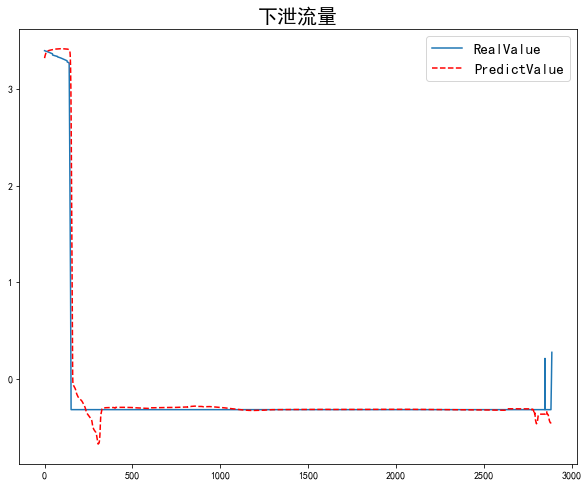

109/109 [==============================] - 0s 3ms/step


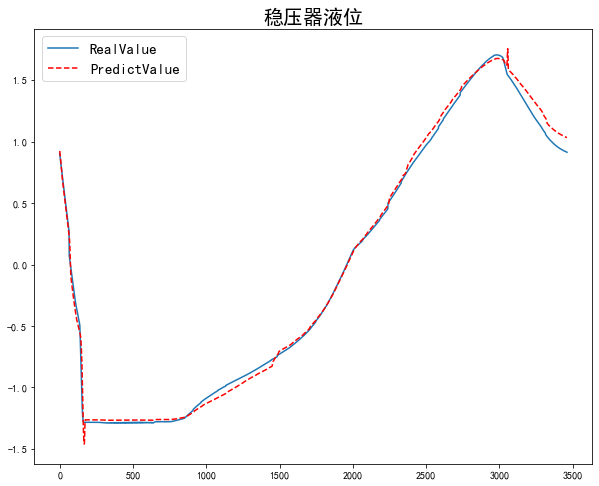

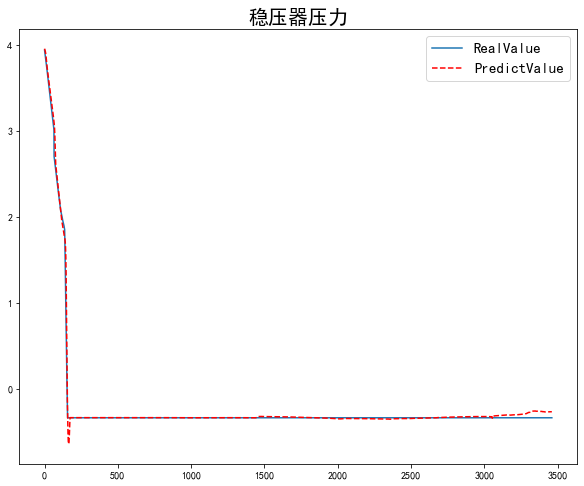

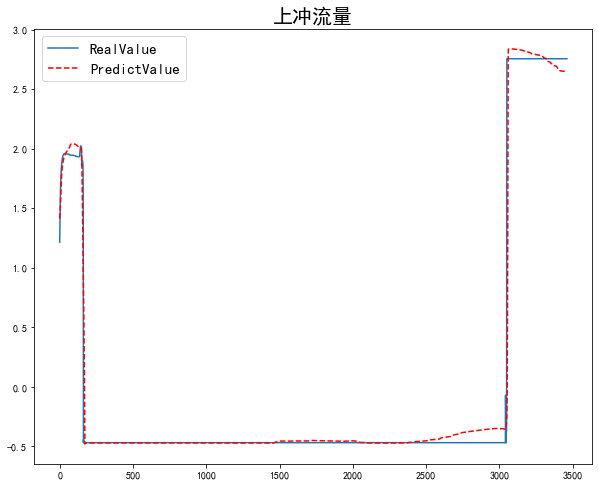

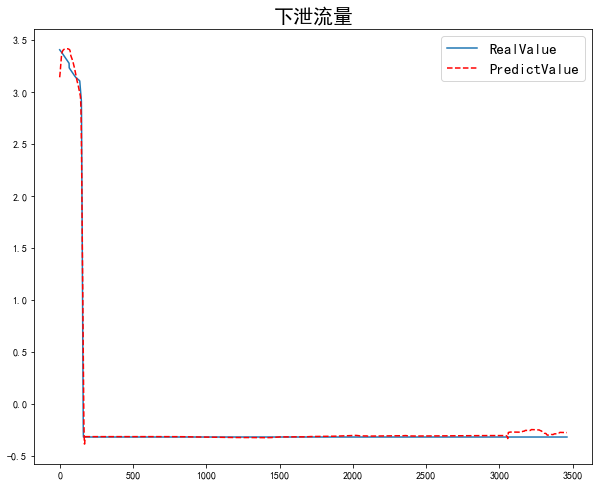

150/150 [==============================] - 0s 3ms/step


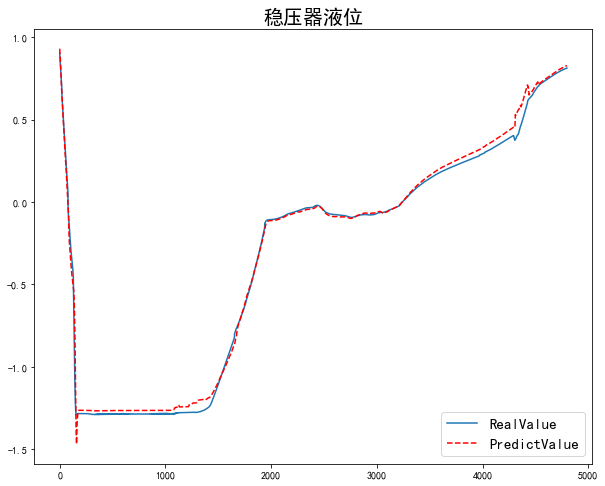

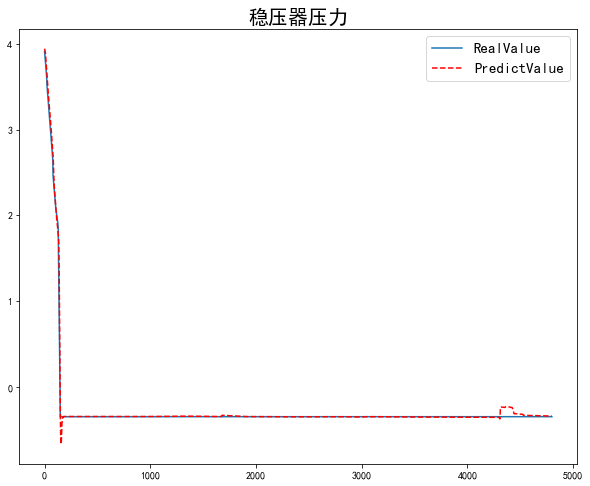

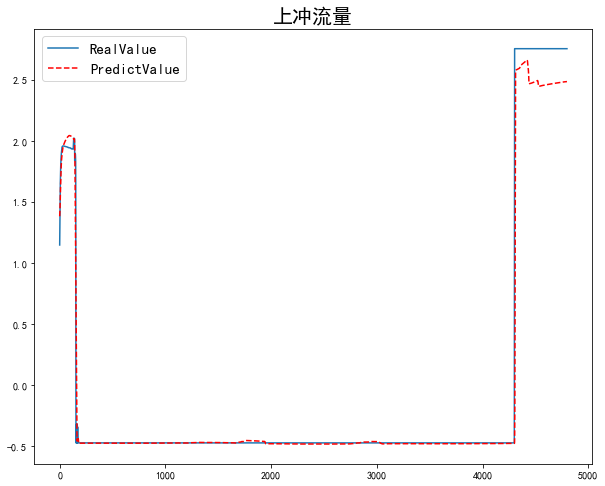

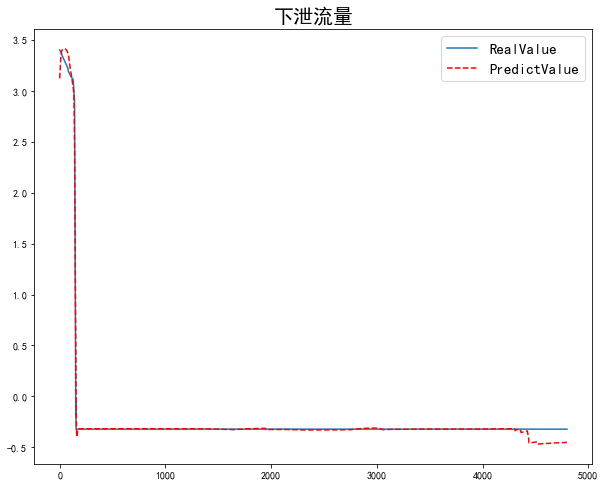

108/108 [==============================] - 0s 3ms/step


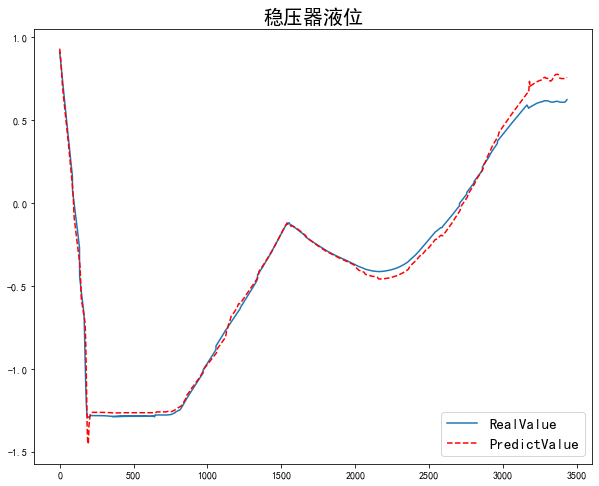

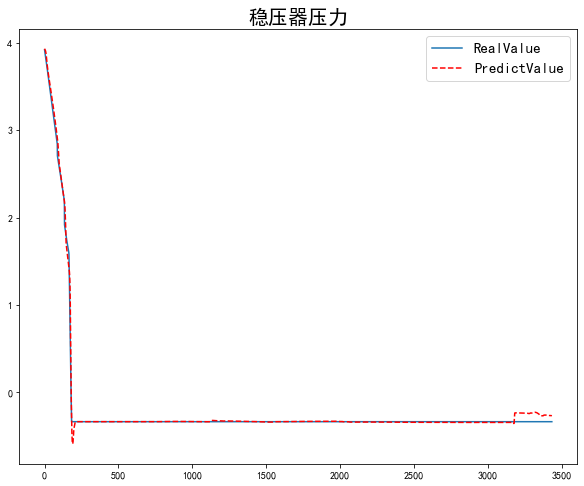

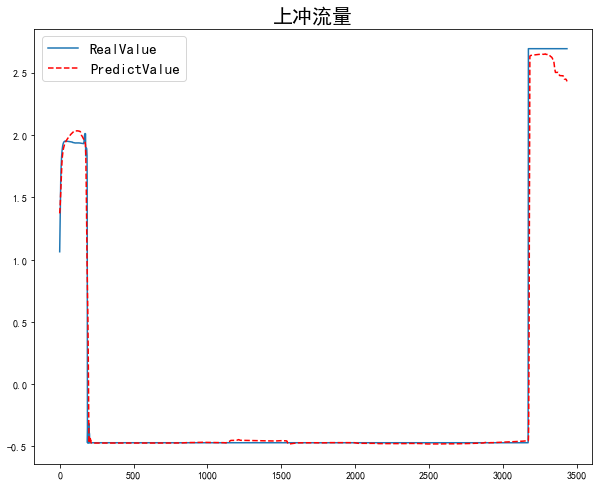

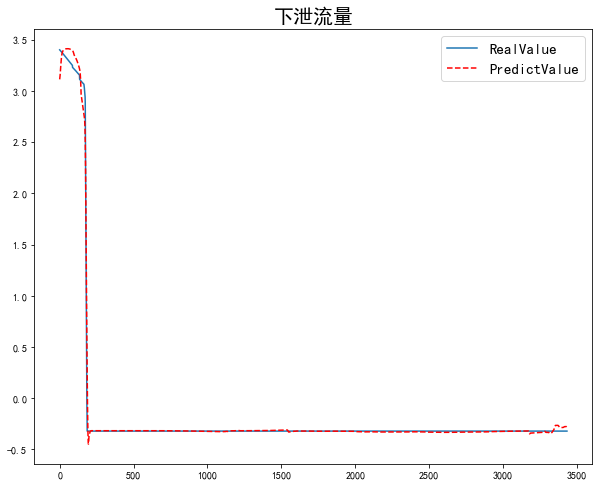

In [17]:
for i in range(len(presurzer_data)):
	train_batch_dataset,val_batch_dataset,test_batch_dataset,train_datasets,train_label_sets,val_datasets,val_label_sets,test_datasets,test_label_sets,mean,std = keras_model.get_data (
		False,presurzer_data[i],4,mean,std,True)
	result (train_datasets,train_label_sets)